<a href="https://colab.research.google.com/github/JiyaMk/Machine-Learning-/blob/main/Intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading the data from kaggle 
import os
os.environ['KAGGLE_USERNAME'] = "jiyamalik"
os.environ['KAGGLE_KEY'] = "e1c36c00f33843fd39f186235b031a73"
!kaggle datasets download -d puneet6060/intel-image-classification 

 94% 327M/346M [00:03<00:00, 111MB/s] 
100% 346M/346M [00:03<00:00, 94.4MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip   # this is for unzipping the data 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# importing all the necessary libraries
import tensorflow as tf
import tensorflow.keras.layers as layers 
import tensorflow.keras.activations as activations
import tensorflow.keras.models as models 
import tensorflow.keras.optimizers as optimizers 
import tensorflow.keras.utils as utils
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.utils import shuffle
import glob

In [ ]:
# glob is basically used when we have to retreive the pathnames in some specified pattern 
# In this, glob has been used with wildcard (*) 
# Generally the syntax of glob function is glob.glob(pathname,*,recursive = False)
glob.glob('/content/seg_train/seg_train/*') 
# There are total of six classes i.e buildings, glacier , sea, mountain, forest, street 

['/content/seg_train/seg_train/street',
 '/content/seg_train/seg_train/buildings',
 '/content/seg_train/seg_train/sea',
 '/content/seg_train/seg_train/forest',
 '/content/seg_train/seg_train/glacier',
 '/content/seg_train/seg_train/mountain']

In [ ]:
# copy the path of the train and test folders 
Train_image = "/content/seg_train/seg_train"
Test_image = "/content/seg_test/seg_test" 
pred_image = "/content/seg_pred"

In [ ]:
# This will return a list containing names of the images in the sea directory under the seg_train directory
# given by path
sea_images = os.listdir(Train_image + "/sea")
print(sea_images,end="") 

['432.jpg', '3147.jpg', '5858.jpg', '631.jpg', '19484.jpg', '1673.jpg', '5362.jpg', '17589.jpg', '2475.jpg', '6224.jpg', '4097.jpg', '4561.jpg', '19780.jpg', '11772.jpg', '5482.jpg', '5175.jpg', '14469.jpg', '2015.jpg', '8090.jpg', '1807.jpg', '16407.jpg', '15919.jpg', '15546.jpg', '11946.jpg', '10948.jpg', '17190.jpg', '3968.jpg', '6219.jpg', '14748.jpg', '10345.jpg', '14843.jpg', '2934.jpg', '427.jpg', '18440.jpg', '13054.jpg', '4536.jpg', '804.jpg', '10493.jpg', '4186.jpg', '17666.jpg', '16297.jpg', '13482.jpg', '7728.jpg', '6599.jpg', '5256.jpg', '5731.jpg', '16717.jpg', '7233.jpg', '1377.jpg', '5423.jpg', '18995.jpg', '17741.jpg', '19810.jpg', '19932.jpg', '7609.jpg', '5750.jpg', '19200.jpg', '4912.jpg', '4322.jpg', '6744.jpg', '11681.jpg', '4386.jpg', '16398.jpg', '5709.jpg', '673.jpg', '17514.jpg', '11786.jpg', '18576.jpg', '7452.jpg', '3110.jpg', '13144.jpg', '12429.jpg', '6962.jpg', '19294.jpg', '4099.jpg', '13080.jpg', '14337.jpg', '15897.jpg', '4514.jpg', '12241.jpg', '2006.

In [ ]:
# This will give us the total number of images in the sea_images list 
len(sea_images)

2274

In [ ]:
# Similarly, this would give me the number of images in the forest_images list 
forest_images = os.listdir(Train_image + "/forest")
len(forest_images)

2271

In [ ]:
mountain_images = os.listdir(Train_image + "/mountain")
glacier_images = os.listdir(Train_image + "/glacier")
buildings_images = os.listdir(Train_image + "/buildings")
street_images = os.listdir(Train_image + "/street")

In [ ]:
# Let us see what is the total number of training images we have in the dataset
a = len(sea_images) # total number of images in the sea_images list
b = len(forest_images)# total number of images in the forest_images list
c = len(mountain_images)# total number of images in the mountain_images list 
d = len(glacier_images)# total number of images in the glacier_images list
e = len(buildings_images)# total number of images in the buildings_images list 
f = len(street_images)# total number of images in the street_images list
total = a+b+c+d+e+f # Adding the number of images in each class will give us the total training images 
print(total)

14034


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_g = ImageDataGenerator(rescale=1./255,  # rescaling the images
                             rotation_range=15, # setting degree range (40) for random rotation 
                             width_shift_range=0.2, # fraction (0.2) of total width
                             height_shift_range=0.2, # fraction (0.2) of total height
                             shear_range=0.2, # shear intensity 
                             zoom_range=0.2, # for zooming inside pictures
                             horizontal_flip=True) #randomly flipping half of the images horizontally

data = ImageDataGenerator(rescale = 1./255) 
pred = ImageDataGenerator(rescale=1./255)   

In [ ]:
# generator for training 
# Train_image is the directory where the data is located. It contains subdirectories, 
# each containing images for a class
train_gen = data.flow_from_directory(Train_image, 
                                     target_size = (150,150), # setting the target size as (150,150)
                                     class_mode = "categorical", #setting class_mode as categorical 
                                                                 #because there are more than two
                                                                 #classes to predict  
                                     color_mode = "rgb",  # color_mode is rgb as there are three 
                                                          # coloured channels
                                     shuffle = True) # shuffles the order of the image

Found 14034 images belonging to 6 classes.


In [ ]:
# generator for testing 
test_gen = data.flow_from_directory(Test_image,
                                    target_size = (150,150),
                                    class_mode = "categorical",
                                    color_mode = "rgb")

Found 3000 images belonging to 6 classes.


In [ ]:
# generator for predictions 
pred_gen = pred.flow_from_directory(pred_image, 
                                    shuffle=False,
                                    class_mode="categorical",
                                    target_size=(150,150)) 

Found 7301 images belonging to 1 classes.


In [ ]:
# __getitem__ is used only in indexed attributes like arrays, dictionaries,lists. These provide 
# validation that only correct values are set to the attributes and the only correct caller has access
# to these attributes 
data1 = test_gen.__getitem__(1)[0]
label = test_gen.__getitem__(1)[1]

In [ ]:
# There are 6 total labels corresponding to each class
l = ["buildings","forest","glacier","mountain","sea","street"]

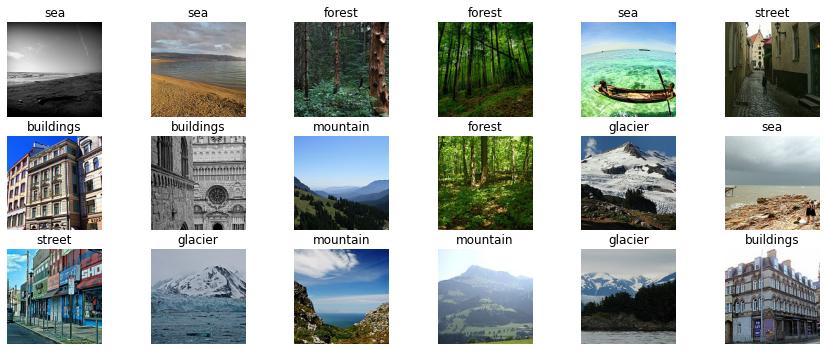

In [ ]:
# This is for plotting the images along with their labels
plt.figure(figsize = (15,8)) 
i = 17
while i>=0: 
    plt.subplot(4, 6, i+1) # shows multiple images 
    plt.title(l[np.argmax(label[i])]) # labels get shown as title 
    plt.axis('off') # axis would not be present 
    plt.imshow(data1[i]) # displays the images 
    i-=1

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [ ]:
model = models.Sequential()  # it allows to create models layer by layer

In [ ]:
# creating two lists dense_layers and conv_layers 
dense_layers = [256, 512]
conv_layers = [128, 256] 

In [ ]:
# training the model by using convolutional and pooling layers
# The inputs are 150X150 rgb images 
for dense in dense_layers:  
    for conv in conv_layers:
        model = tf.keras.models.Sequential([tf.keras.layers.Conv2D( conv, (3,3), activation = 'relu',
                                                                   input_shape = (150,150,3))])
        model.add(MaxPooling2D(2,2))

In [ ]:
# adding more layers to the model 
model.add(Conv2D( conv, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

In [ ]:
model.add(Conv2D( 64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))           

In [ ]:
model.summary()  # prints the summary of the model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 256)     7168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 256)       590080    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        147520    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
Total params: 744,768
Trainable params: 744,768
Non-trainable params: 0
________________________________________________

In [ ]:
model.add(Conv2D( 32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))            

In [ ]:
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(dense, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
# compiling the model using the optimizer (Adam)
model.compile(optimizer= keras.optimizers.Adam(lr=0.0001),loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
 # fitting the model to train it 
 history = model.fit(train_gen, epochs=25, validation_data = test_gen, verbose = 1) 

Epoch 1/25
439/439 [==============================] - 53s 122ms/step - loss: 1.1452 - accuracy: 0.5415 - val_loss: 0.8787 - val_accuracy: 0.6797
Epoch 2/25
439/439 [==============================] - 54s 123ms/step - loss: 0.8334 - accuracy: 0.6889 - val_loss: 0.7536 - val_accuracy: 0.7213
Epoch 3/25
439/439 [==============================] - 55s 126ms/step - loss: 0.7159 - accuracy: 0.7357 - val_loss: 0.6653 - val_accuracy: 0.7470
Epoch 4/25
439/439 [==============================] - 55s 125ms/step - loss: 0.6354 - accuracy: 0.7676 - val_loss: 0.5760 - val_accuracy: 0.8007
Epoch 5/25
439/439 [==============================] - 55s 125ms/step - loss: 0.5889 - accuracy: 0.7879 - val_loss: 0.5744 - val_accuracy: 0.7890
Epoch 6/25
439/439 [==============================] - 55s 125ms/step - loss: 0.5506 - accuracy: 0.7998 - val_loss: 0.5358 - val_accuracy: 0.8060
Epoch 7/25
439/439 [==============================] - 55s 125ms/step - loss: 0.5236 - accuracy: 0.8091 - val_loss: 0.5168 - val_ac

In [ ]:
model.evaluate(test_gen)  # evaluating the accuracy of the model

94/94 [==============================] - 4s 40ms/step - loss: 0.3940 - accuracy: 0.8620


[0.3940202593803406, 0.8619999885559082]

In [ ]:
# making predictions for the model
final = model.predict(pred_gen) 
final  

array([[4.0693840e-01, 2.4634738e-01, 6.4607849e-03, 1.1882217e-02,
        9.0274349e-04, 3.2746848e-01],
       [4.3590642e-03, 6.3862553e-04, 6.8384148e-02, 8.8234234e-01,
        4.1646894e-02, 2.6289385e-03],
       [3.2242844e-01, 3.3299787e-07, 1.2890378e-05, 3.6344866e-10,
        3.0469416e-06, 6.7755526e-01],
       ...,
       [5.5605109e-04, 2.1072619e-03, 5.0755285e-02, 7.5066769e-01,
        1.9315448e-01, 2.7592629e-03],
       [3.6320350e-07, 9.9996734e-01, 3.1413765e-05, 7.8948580e-07,
        3.1749444e-08, 6.2356548e-08],
       [3.9297767e-02, 1.4374167e-06, 1.2569162e-05, 2.7961067e-10,
        9.1427428e-06, 9.6067905e-01]], dtype=float32)

In [ ]:
pred_indices = np.argmax(final,axis=1)  # returns the indices of the maximum values along the axis=1

In [ ]:
labels = (train_gen.class_indices)
labels = dict((x,y) for y,x in labels.items())  # creating a dictionary 
predictions = [labels[y] for y in pred_indices] # making predictions 

In [ ]:
predictions # displaying the final predictions 

['buildings',
 'mountain',
 'street',
 'mountain',
 'mountain',
 'forest',
 'sea',
 'glacier',
 'sea',
 'street',
 'sea',
 'street',
 'mountain',
 'buildings',
 'buildings',
 'glacier',
 'forest',
 'forest',
 'mountain',
 'sea',
 'street',
 'street',
 'street',
 'street',
 'glacier',
 'buildings',
 'forest',
 'mountain',
 'glacier',
 'mountain',
 'mountain',
 'sea',
 'mountain',
 'sea',
 'sea',
 'mountain',
 'sea',
 'glacier',
 'mountain',
 'mountain',
 'sea',
 'street',
 'glacier',
 'sea',
 'sea',
 'forest',
 'mountain',
 'glacier',
 'street',
 'mountain',
 'buildings',
 'buildings',
 'forest',
 'buildings',
 'forest',
 'sea',
 'glacier',
 'street',
 'buildings',
 'street',
 'buildings',
 'forest',
 'glacier',
 'buildings',
 'forest',
 'mountain',
 'glacier',
 'street',
 'forest',
 'mountain',
 'forest',
 'forest',
 'sea',
 'street',
 'forest',
 'forest',
 'mountain',
 'sea',
 'glacier',
 'glacier',
 'street',
 'mountain',
 'mountain',
 'forest',
 'forest',
 'mountain',
 'buildings',
